# **Kelompok 5:**
1. Fildzah Khalishah Ghassani(E1E121026)
1. Ni Made Sri Ulandari(E1E121007)
1. Rafli Balani(E1E121086)

# **Data COVID-19 di Korea Selatan**
Data yang tersedia merupakan hasil rekaman kasus-kasus mulai 20 Januari s/d 30 April 2020
(Kaggle, 2020). Setiap data berupa tabel, yang dapat dibuka dengan Excel. Sebagian tabel pada
data COVID-19 tersebuat adalah:
1. Data kasus:
* Case.csv : Kasus-kasus terpapar COVID-19 dengan kolom case_id, province, city, group, infection_case, confirmed, latitude dan longitude.
2. Data pasien:
* PatientInfo.csv (3.388 baris): Data epidemis pasien COVID-19 dengan kolom patient_id, global_num, sex, birth_year, age, country, province, city, disease, infection_case, infection_order, infected_by, contact_number, symptom_onset_date, confirmed_date, released_date,deceased_date, state dan confirm_released.
3. Data time series:
* Time.csv (102 baris): data untuk status COVID-19 dengan kolom date, time, test, negative, confirmed, released dan deceased.
* TimeAge.csv (540 baris): data untuk status COVID-19 berdasar umur dengan kolom date, time, age, confirmed, dan deceased.
* TimeGender.csv (120 baris): data untuk status COVID-19 berdasar gender dengan kolom date, time, sex, confirmed dan deceased.
* TimeProvince.csv (1.734 baris): data untuk status COVID-19 untuk tiap provinsi dengan kolom date, time, province, confirmed, released dan deceased.

Contoh sebagian isi dari file-file di atas diberikan di Appendiks.

# **Bentuk-bentuk Visualisasi**
Terdapat bermacam-macam bentuk visualisasi, namun mayoritas kebutuhan untuk
memvisualisasikan data dapat dipenuhi dengan menggunakan beberapa bentuk saja. Di bawah
ini diberikan bahasan singkat tentang beberapa bentuk visualisasi dan kapan cocok digunakan
yang digunakan pada bab ini(ulasan lebih lengkap dan detil dapat ditemukan di(Knaflic, 2015)):
* Garis (line): Cocok untuk data “time-series” dan memberikan trend, misalnya harga satu atau lebih saham dari tanggal ke tanggal.
* Diagram Lingkaran(Pie Chart): alat visualisasi data yang berguna untuk mempresentasikan komposisi proporsional dari suatu keseluruhan.
* Bar vertikal: Cocok digunakan ketika ingin ditunjukkan nilai-nilai beberapa variabel atau kategori agar terlihat perbandingaannya.
* Bar horisontal: Sama dengan bar vertikal, namun lebih cocok digunakan ketika nama variabel atau kategori dari data panjang (misalnya, nama provinsi).

Selain bentuk-bentuk di atas, terdapat bentuk visualisasi untuk kebutuhan khusus lainnya,
misalnya:
* Visualisasi data pada peta: Visualisasi data pada titik-titik tertentu (misalnya kota,kecamatan, rumah sakit, dll.) dilakukan dengan membuat simbol (misalnya lingkaran) yang proporsional dengan nilai data. Pada peta area wilayah dengan batas-batas tertentu (propinsi atau wilayah yang lebih kecil), visualisasi data dapat dinyatakan dengan isi warna area yang berdegradasi sesuai nilai data, misalnya makin gelap makin besar (Kraak, 2005).Dengan visualisasi data pada peta, orang dengan cepat dapat mengaitkan data dengan lokasi untuk tujuan tertentu. 

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
path = '/kaggle/input/covid19korsel/'
case = pd.read_csv(path+'Case.csv')
p_info = pd.read_csv(path+'PatientInfo.csv')
policy = pd.read_csv(path+'Policy.csv')
region = pd.read_csv(path+'Region.csv')
s_trend = pd.read_csv(path+'SearchTrend.csv')
time = pd.read_csv(path+'Time.csv')
timegender = pd.read_csv(path+'TimeGender.csv')

In [3]:
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [4]:
dfcase = pd.DataFrame(case)

# **Pertanyaan 1:** 
Bagaimana trend test COVID-19 dilakukan di Korsel dari waktu ke waktu?
Apakah banyak orang  yang “terbebas”?

Bentuk visual yang cocok adalah garis, yang merepresentasikan jumlah (test dan yang negatif)
terhadap waktu. Pada file Time.csv, data sudah tersedia. Hanya saja, pada data asli, tanggal
ditulis dengan format MM/DD/YYYY. Karena perioda sudah diketahui (Januari s/d juli 2020),
format tanggal perlu diubah ke DD-nama bulan agar grafik lebih singkat dan cepat dibaca,lalu grafik dibuat dengan python.

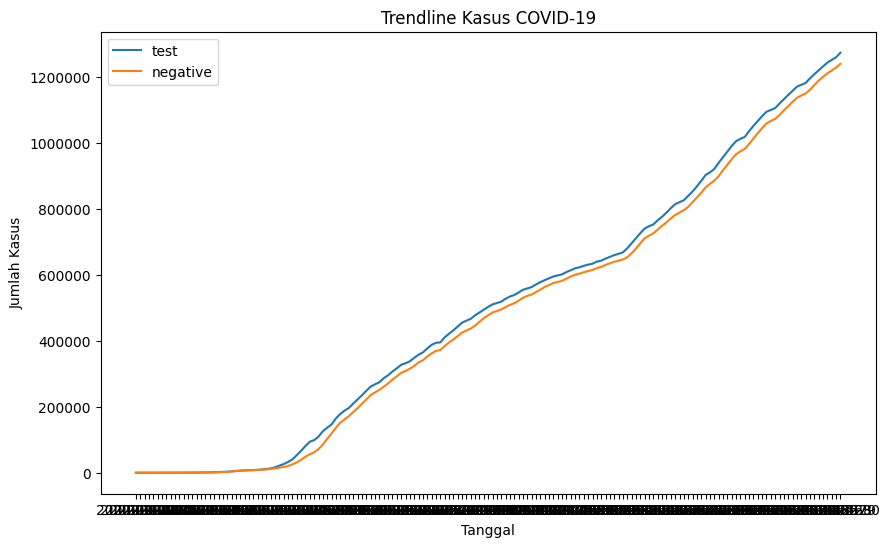

In [5]:
#no 1
columns_to_plot = ['test', 'negative']
plt.figure(figsize=(10, 6))
for column in columns_to_plot:
    plt.plot(time['date'], time[column], label=column)
plt.title('Trendline Kasus COVID-19')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Kasus')
plt.legend()
plt.ticklabel_format(style='plain', axis='y')

# Tampilkan grafik
plt.show()

# **Penjelasan Grafik di atas:**

Grafik garis diatas menunjukkan hasil test yang naik secara eksponensial dari Februari hingga awal Juli dengan sebagian besar hasil negatif. Peningkatan eksponensial ini bisa disebabkan oleh berbagai faktor, seperti peningkatan kesadaran akan pentingnya pengujian, kebijakan pemerintah yang mendukung, dan meningkatnya kasus yang mendorong permintaan akan tes yang lebih besar. Kenaikan yang signifikan dalam jumlah tes mencerminkan perluasan kapasitas, peningkatan fasilitas pengujian, serta peningkatan akses masyarakat terhadap tes COVID-19. Namun, walaupun terjadi peningkatan jumlah tes, mayoritas hasilnya menunjukkan negatif. Hal ini mungkin disebabkan oleh populasi yang diuji yang kebanyakan berada dalam kondisi sehat atau belum terpapar COVID-19 secara signifikan, seleksi kriteria tes yang lebih spesifik, atau metode tes yang mungkin kurang sensitif dalam mendeteksi infeksi.

# **Pertanyaan 2:** 
Bagaimana trend akumulasi terkonfirmasi(positif), yang sembuh dan meninggal
dari waktu ke waktu?

Sama dengan trend test, visualisasi yang cocok adalah grafik garis. Data tersedia pada file
Time.csv, kolom date, confirmed, released dan deceased. Seperti sebelumnya, format tanggal perlu diubah, lalu grafik dibuat dengan Python. 

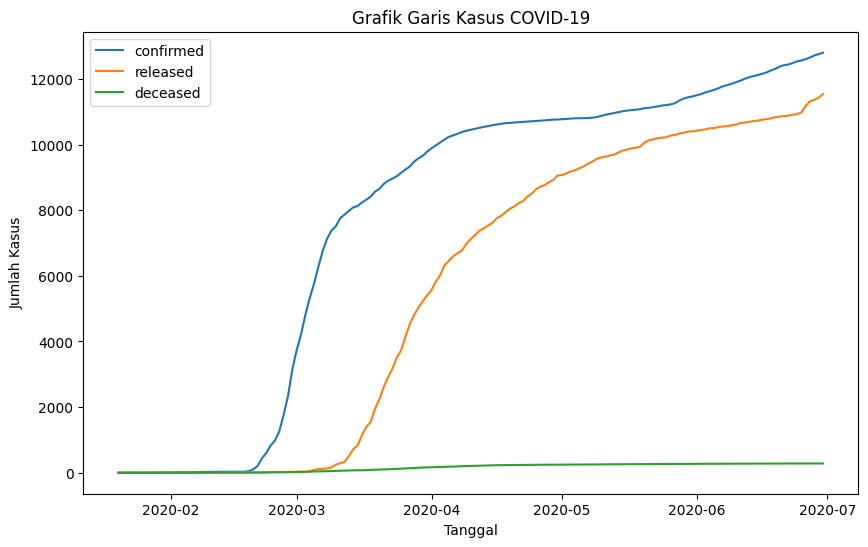

In [6]:
#no 1
import matplotlib.pyplot as plt
time['date'] = pd.to_datetime(time['date'])
columns_to_plot = ['confirmed', 'released', 'deceased']
plt.figure(figsize=(10, 6))
for column in columns_to_plot:
    plt.plot(time['date'], time[column], label=column)
plt.title('Grafik Garis Kasus COVID-19')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Kasus')
plt.legend()
# Tampilkan grafik
plt.show()

# **Penjelasan Grafik di atas:**

Penyebaran COVID-19 di Korsel segera terkendali (grafik naik dari
pertengahan Februari sampai akhir Maret, selanjutnya landai dan kembali naik di awal Juni sampai awal juli). Bagi yang terpapar, proses penyembuhan juga relatif cepat (grafik naik secara tajam dari Maret sampai awal Juni). 

# **Pertanyaan 3:**
Jika di banyak negara, pria lebih banyak yang terinfeksi COVID-19, bagaimana
dengan di Korsel?

Untuk menjawab pertanyaan tersebut, data dapat diperoleh dari file TimeGender.csv pada dua
baris terakhir, yang berisi jumlah wanita dan pria yang terkonfirmasi terpapar COVID-19 dan
yang meninggal pada tanggal 30 April 2020. Nilai kolom sex dan confirmed lalu digunakan untuk
membuat pie-chart dengan Matplotlib di Python. 

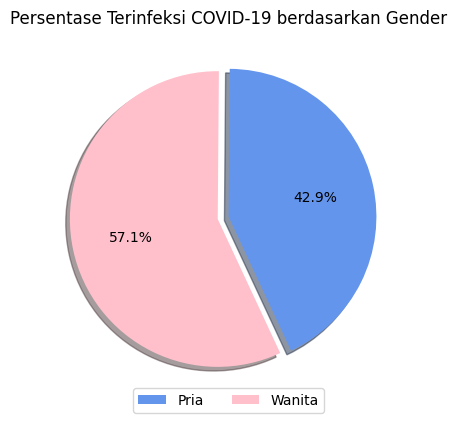

In [7]:
#no 3

# Membaca file CSV
t_gender = pd.DataFrame(timegender)

# Ambil dua baris terakhir
latest_rows = t_gender.tail(2)
count = latest_rows.pivot(index='time', columns='sex', values='confirmed')

pastel_blue = '#6495ED'  # warna biru
pastel_pink = '#FFC0CB'  # warna pink

# Plot pie chart
explode = (0, 0.075)
plt.pie(latest_rows['confirmed'], autopct='%1.1f%%', startangle=295, colors=[pastel_blue, pastel_pink], explode=explode, shadow=True)

# Tampilkan pie chart
plt.title('Persentase Terinfeksi COVID-19 berdasarkan Gender', fontsize=12)
plt.legend(labels=['Pria', 'Wanita'], bbox_to_anchor=(0.5, -0.05), loc='lower center', ncol=2)
plt.show()


# **Penjelasan Pie Chart di atas**

Dapat di lihat pada pie chart diatas, bahwa proporsi infeksi COVID-19 tampak lebih tinggi pada wanita yaitu sebanyak 57.1% dibandingkan dengan pria yaitu 42.9%. 

# **Pertanyaan 8:** 
Jika pada grafik Top-5 provinsi (di bawah Daegu), ditunjukkan bahwa pada beberapa provinsi memiliki angka paparan yang tinggi, apakah lokasi mereka berdekatan?

Untuk menjawab pertanyaan itu, perlu dicari tools yang dapat memaparkan peta distribusi per
provinsi. Selanjutnya membuat program dengan Python dengan menggunakan library
Geopandas yang instalasinya tidak mudah karena membutuhkan kecocokan berbagai library.
Program lalu dibuat dengan masukan data paparan tiap provinsi di atas dan peta Korsel.

/tmp/ipykernel_47/4155899707.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_df.geometry.centroid.x, merged_df.geometry.centroid.y, merged_df['province']):
/tmp/ipykernel_47/4155899707.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_df.geometry.centroid.x, merged_df.geometry.centroid.y, merged_df['province']):


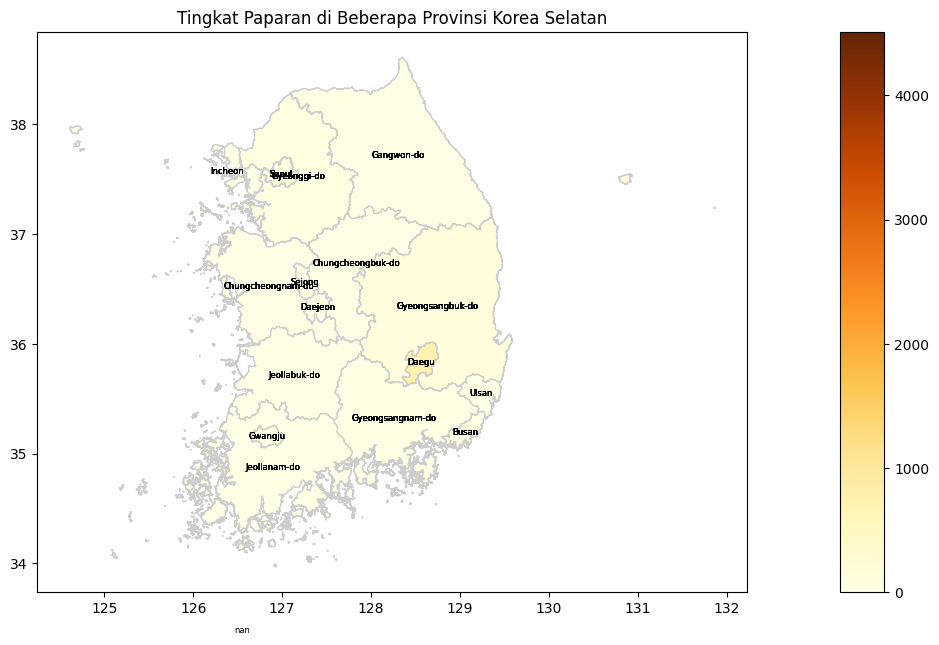

In [8]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

shpfile = '/kaggle/input/korsel'
provinsi = gpd.read_file(shpfile)
# Menggabungkan dataset provinsi dengan data tingkat paparan
merged_df = provinsi.merge(dfcase[['province', 'confirmed']], how='left', left_on='NAME_1', right_on='province')

# Menentukan rentang warna berdasarkan tingkat paparan
vmin, vmax = merged_df['confirmed'].min(), merged_df['confirmed'].max()

# Menyiapkan subplot untuk peta dan skala warna
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Menampilkan peta dengan warna berdasarkan tingkat paparan (gunakan palet warna 'YlOrBr')
merged_df.plot(column='confirmed', cmap='YlOrBr', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax, vmin=vmin, vmax=vmax, alpha=1.0)

# Menambahkan label nama provinsi
for x, y, label in zip(merged_df.geometry.centroid.x, merged_df.geometry.centroid.y, merged_df['province']):
    ax.text(x, y, label, fontsize=6, ha='center', va='center', color='black')

# Menambahkan judul
ax.set_title('Tingkat Paparan di Beberapa Provinsi Korea Selatan')

# Menampilkan peta
plt.show()

# **Penjelasan Map Tingkat Pemaparan Provinsi Di korea Selatan:**
Dapat dilihat dari map diatas bahwa di sekitar provinsi Daegu, paparan cukup tinggi. Jadi, Daegu menjadi provinsi episentrum COVID-19. Episentrum lainnya terletak di sebelah utara, povinsi Gyeonggi dan Seoul yang berdekatan.

# **Pertanyaan-11:** 
Bagaimana dengan asal paparan? Tempat-tempat mana saja yang paling banyak menjadi ajang penularan COVID-19?

Untuk menjawab, data belum tersedia namun dapat disiapkan dari file Case.csv dengan
memanfaatkan kolom infection_case dan confirmed. Di sini perlu dibuat sebuah kolom baru,
place_group, yang diisi dengan kategori tempat (gereja, gym,rumah sakit, dll.). Nilai kolom
place_group ditentukan berdasar isi kolom infection_case. Perhitungan dengan group-by
dilakukan untuk menjumlahkan nilai-nilai confirmed untuk tiap nilai di place_group. Hasilnya
lalu diurutkan dari terbesar ke terkecil dan digunakan untuk membuat grafik bar horisontal. 

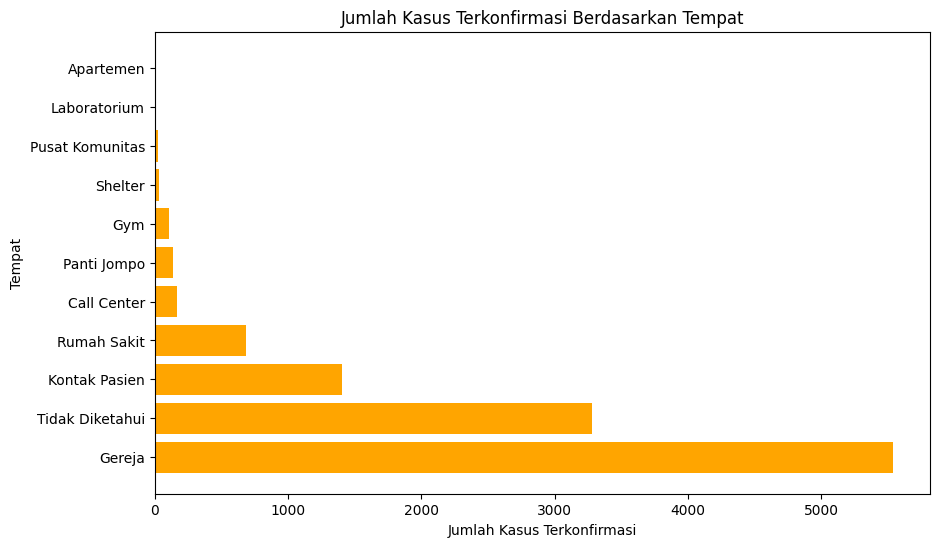

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file CSV
data = pd.DataFrame(case)

# Membuat fungsi untuk mengelompokkan tempat berdasarkan infection_case
def categorize_place(infection_case):
    if 'church' in infection_case.lower():
        return 'Gereja'
    elif 'hospital' in infection_case.lower():
        return 'Rumah Sakit'
    elif 'school' in infection_case.lower():
        return 'Sekolah'
    elif 'gym' in infection_case.lower():
        return 'Gym'
    elif 'laboratory' in infection_case.lower():
        return 'Laboratorium'
    elif 'apartment' in infection_case.lower():
        return 'Apartemen'
    elif 'community center' in infection_case.lower():
        return 'Pusat Komunitas'
    elif 'shelter' in infection_case.lower():
        return 'Shelter'
    elif 'workplace' in infection_case.lower():
        return 'Tempat Kerja'
    elif 'nursing home' in infection_case.lower() or 'elderly' in infection_case.lower():
        return 'Panti Jompo'
    elif 'call center' in infection_case.lower():
        return 'Call Center'
    elif 'entertainment' in infection_case.lower() or 'tourist attraction' in infection_case.lower():
        return 'Tempat Hiburan/Objek Wisata'
    elif 'contact' in infection_case.lower():
        return 'Kontak Pasien'
    elif 'import' in infection_case.lower():
        return 'Import'
    else:
        return 'Tidak Diketahui'

# Membuat kolom baru 'place_group' berdasarkan kategori tempat
data['place_group'] = data['infection_case'].apply(categorize_place)

# Melakukan perhitungan dengan group-by untuk menjumlahkan nilai-nilai confirmed berdasarkan place_group
grouped_data = data.groupby('place_group')['confirmed'].sum().reset_index()

# Mengurutkan hasil dari terbesar ke terkecil
sorted_data = grouped_data.sort_values(by='confirmed', ascending=False)

# Membuat grafik bar horisontal
plt.figure(figsize=(10, 6))
plt.barh(sorted_data['place_group'], sorted_data['confirmed'], color='orange')
plt.xlabel('Jumlah Kasus Terkonfirmasi')
plt.ylabel('Tempat')
plt.title('Jumlah Kasus Terkonfirmasi Berdasarkan Tempat')
plt.show()


# **Penjelasan Grafik bar di atas:**

Gereja merupakan tempat dimana mayoritas orang terpapar. Selain itu, orang dapat terpapar dari kontak dengan pasien dan berasal dari luar Korsel(import). Namun, terdapat lebih dari 3000 kasus yang tidak dapat diketahui darimana mereka tertular. 

# **Pertanyaan-12:** 
Berapa lama orang terinfeksi COVID-19 akan sembuh? Apakah umur berpengaruh terhadap lama sakit (dan dirawat di rumah sakit)?

Data belum tersedia, namun lama kesembuhan dapat dihitung dari file PatientInfo.csv (yang
berisi data cukup detil data sampel pasien). Lama pasien sembuh dihitung dengan cara
mengurangi nilai released_date dengan confirmed_date menggunakan Python. Setelah itu, dengan
group-by dihitung rata-rata kesembuhan tiap kelompok umur. Hasilnya digunakan untuk
membuat grafik bar horisotal.

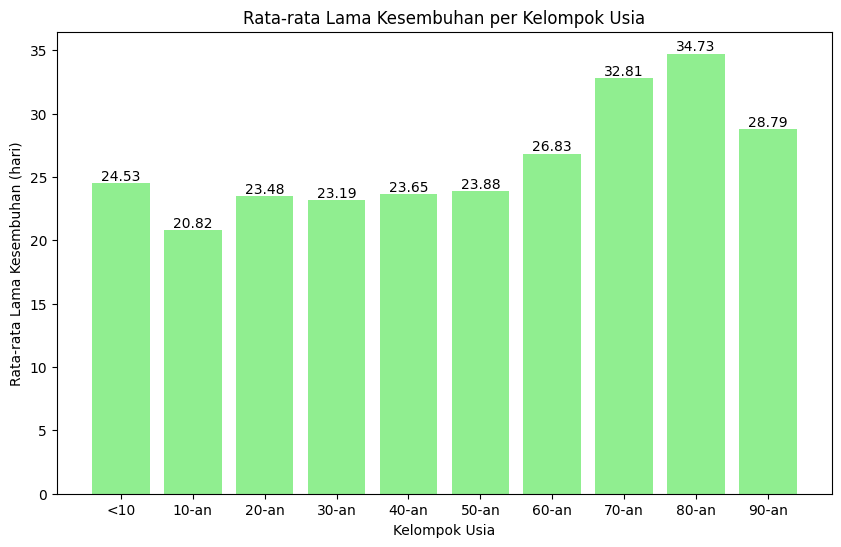

In [10]:
#12
dfinfo = pd.DataFrame(p_info)

# Mengonversi kolom 'age' menjadi nilai numerik dengan mengambil batas bawah rentang usia
dfinfo['age'] = dfinfo['age'].str.extract('(\d+)').astype(float)

# Mengonversi kolom 'confirmed_date' dan 'released_date' ke dalam format datetime
dfinfo['confirmed_date'] = pd.to_datetime(dfinfo['confirmed_date'])
dfinfo['released_date'] = pd.to_datetime(dfinfo['released_date'])

# Menghitung lama kesembuhan (dalam hari)
dfinfo['lama_kesembuhan'] = (dfinfo['released_date'] - dfinfo['confirmed_date']).dt.days

# Menentukan kelompok usia (misalnya: 0-9, 10-19, dst.)
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 100]
labels = ['<10', '10-an', '20-an', '30-an', '40-an', '50-an', '60-an', '70-an', '80-an', '90-an']
dfinfo['kelompok_usia'] = pd.cut(dfinfo['age'], bins=bins, labels=labels, right=False)

# Mengelompokkan berdasarkan kelompok usia dan menghitung rata-rata lama kesembuhan
rata_rata_kesembuhan = dfinfo.groupby('kelompok_usia')['lama_kesembuhan'].mean().reset_index()

# Membuat grafik batang horizontal
plt.figure(figsize=(10, 6))
bars = plt.bar(rata_rata_kesembuhan['kelompok_usia'], rata_rata_kesembuhan['lama_kesembuhan'], color='lightgreen')

# Menambahkan nilai rata-rata di atas batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black')

plt.xlabel('Kelompok Usia')
plt.ylabel('Rata-rata Lama Kesembuhan (hari)')
plt.title('Rata-rata Lama Kesembuhan per Kelompok Usia')
plt.show()

# **Penjelasan Grafik Bar diatas:**

Rata-rata lama pasien sembuh lebih dari 20 hari dan secara umum naik berdasar umur. Peningkatan secara signifikan terjadi mulai umur 60an - 80an.